In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from data_loaders import load_da
from calpycles.plotting.distributions import plot_samples_1d

Using custom matplotlib style from 'mplstyle' file


In [3]:
model_name = "WENO_FULLRES"
DA = load_da(model_name=model_name)

# posterior samples
E_post = DA.analysis()
E_post_c = DA.to_constrained(E_post)

Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64_seed0...
... done loading samples for ensemble DYCOMS_RF01_N64_seed0.
Loaded observation DYCOMS_RF01_N64_seed0 from ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_observations.nc.
[3.08641975e-07 4.34027778e-06]
[ 4.   56.25]


In [5]:
# run the posterior ensemble

from calpycles.pycles_ensemble import PyCLESensemble
import os
import numpy as np

from data_loaders import load_nature
from data_loaders import model_names
from data_loaders import make_namelist_settings

# location
this_path = os.path.abspath("")
data_folder = os.path.join(this_path,"data/")

Using default parameter properties in parameter ensemble init.
Using specified parameter ranges to assemble dist_kwargs.
Saved GaussRV mean and var to /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/dist_parameters_mean.npy; _covar.npy
Saved parameter samples (.npy, .nc, .txt) to  /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior
Using specified parameter ranges to assemble dist_kwargs.


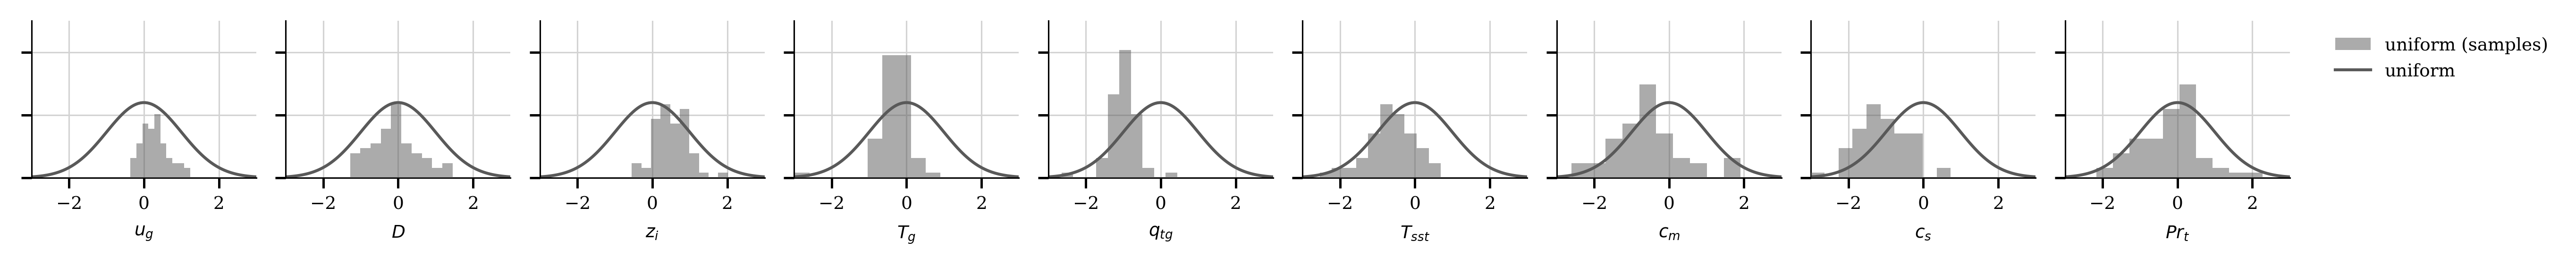

Saved figure  /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/fig-dists_1d_uniform_unconstrained


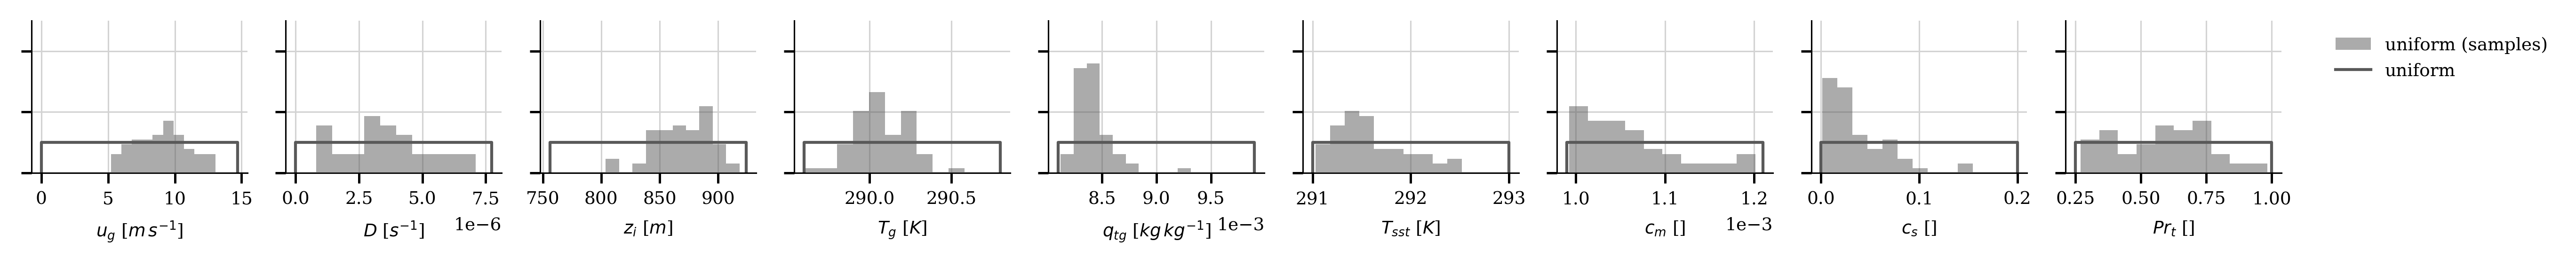

Saved figure  /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/fig-dists_1d_uniform_constrained
Using specified parameter ranges to assemble dist_kwargs.
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/0
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/1
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/2
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/3
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/4
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/WENO_FULLRE

In [7]:
n_ens = 64
name = f"DYCOMS_RF01_N{n_ens}_seed0_posterior"
model_name = "WENO_FULLRES"

ens = PyCLESensemble(
    name=name,
    n_samples=64,
    path=os.path.join(data_folder, model_name, "REAL", name),
    verbose=True,
    test=False,
    case="DYCOMS_RF01",
)

# set parameter samples
ens.param_ens.samples = E_post

ens.param_ens.plot()

# initialize samples from these parameters
ens.init_samples(  
    namelist_settings=make_namelist_settings(model_name)
)
for s in ens.samples:
    s.write_namelist()

In [8]:
ens.run(
    submit_job=True,
    do_wait_and_clean=False,
)

Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/0
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/1
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/2
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/3
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/4
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/5
Wrote namelist to: /cluster/work/climate/dgrund/experiments/clean_paper_experiments/data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/6
Wrote namelist to: /cluster/work/climate/dgrund/

Using default parameter properties in parameter ensemble init.
file_mean='./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/dist_parameters_mean.npy'
file_covar='./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/dist_parameters_covar.npy'
file_mean='./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/dist_parameters_mean.npy'
file_covar='./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/dist_parameters_covar.npy'
Using specified parameter ranges to assemble dist_kwargs.
file_mean='./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/dist_parameters_mean.npy'
file_covar='./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/dist_parameters_covar.npy'
Loaded parameter samples from  ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64_seed0_posterior...
... done loading samples for ensemble DYCOMS_RF01_N64_seed0_posterior.
Cleaning sample files of 0...
Cleaning sample files of 1...
Cleaning sample files

/cluster/work/climate/dgrund/git/dana-grund/CalPyCLES/environment/.venv/calpycles/lib/python3.9/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


	[create_mfdataset_with_nans()] Found 63 files.
	[create_mfdataset_with_nans()] Missing 1, namely [44]. Inserting nans for missing samples.


/cluster/work/climate/dgrund/git/dana-grund/CalPyCLES/environment/.venv/calpycles/lib/python3.9/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Saved full obs ensemble 'DYCOMS_RF01_N64_seed0_posterior' to
./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/samples_observations_full_profiles.nc / _timeseries.nc.
Loaded observation DYCOMS_RF01_N64_seed0_posterior from ('./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/samples_observations_full_profiles.nc', './data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/samples_observations_full_timeseries.nc').
Computing observation ensemble profile stats...
Reading...
Computing...
Saving ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/ensemble_stats/Nens64_profiles_average_time_mean.nc...
Saving ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/ensemble_stats/Nens64_profiles_average_time_median.nc...
Saving ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/ensemble_stats/Nens64_profiles_average_time_CI.nc...
Done computing profiles ensemble stats.
Computing observation ensemble timeseries stats...
Reading...
Computing...
Saving ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posteri

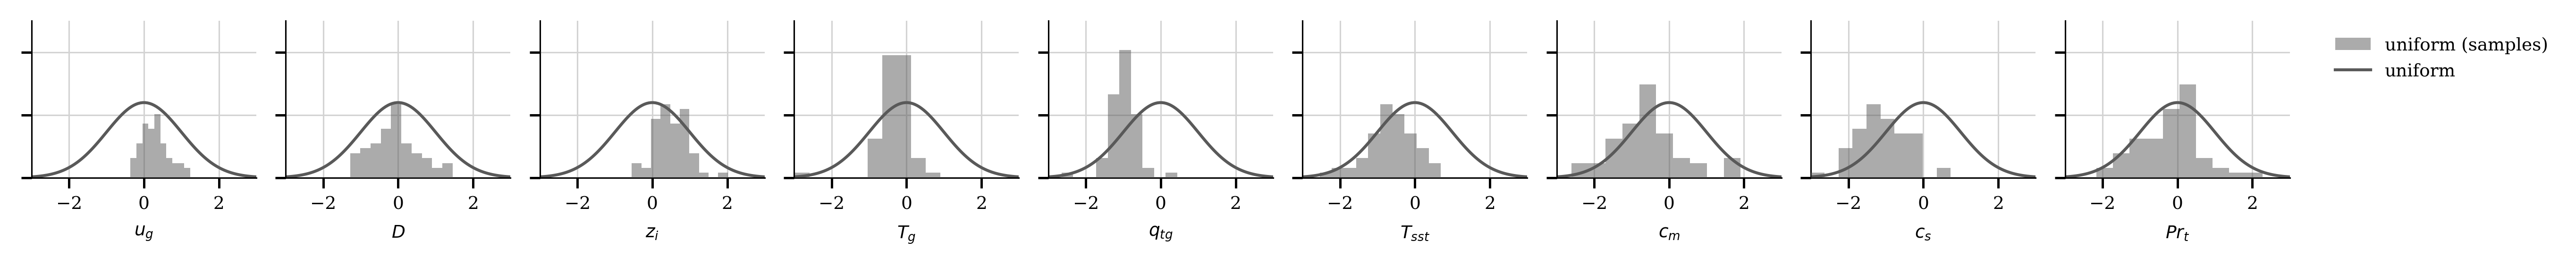

Saved figure  ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/fig-dists_1d_uniform_unconstrained


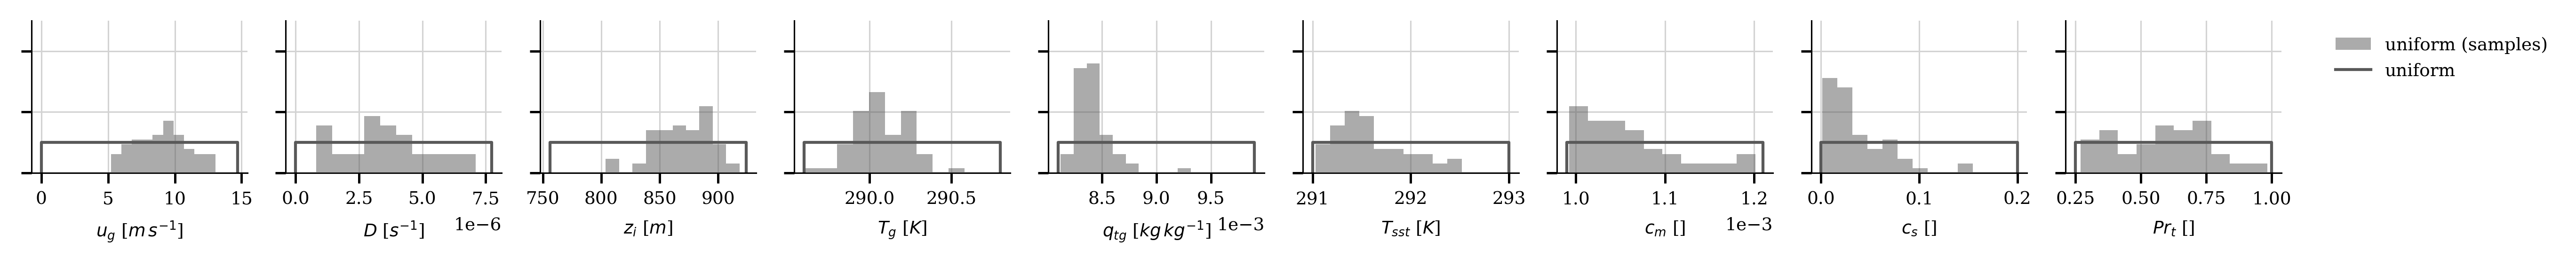

Saved figure  ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/fig-dists_1d_uniform_constrained


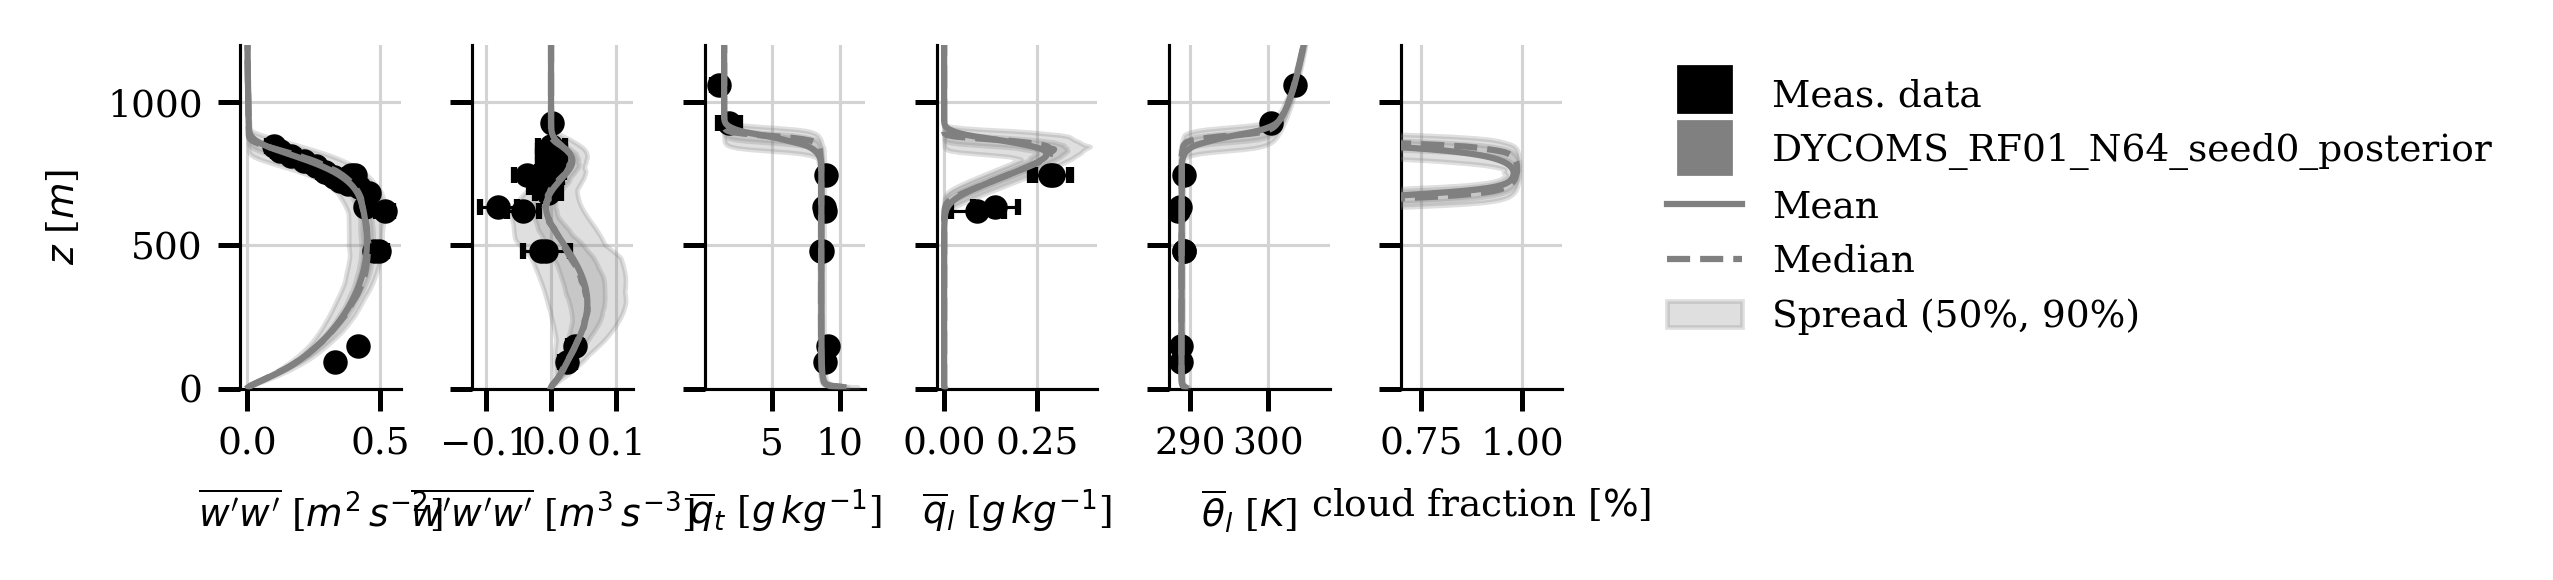

Saved figure  ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/fig-ensemble_obs_DYCOMS_RF01_N64_seed0_posterior_profiles


/cluster/work/climate/dgrund/git/dana-grund/CalPyCLES/src/calpycles/plotting/__init__.py:210: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


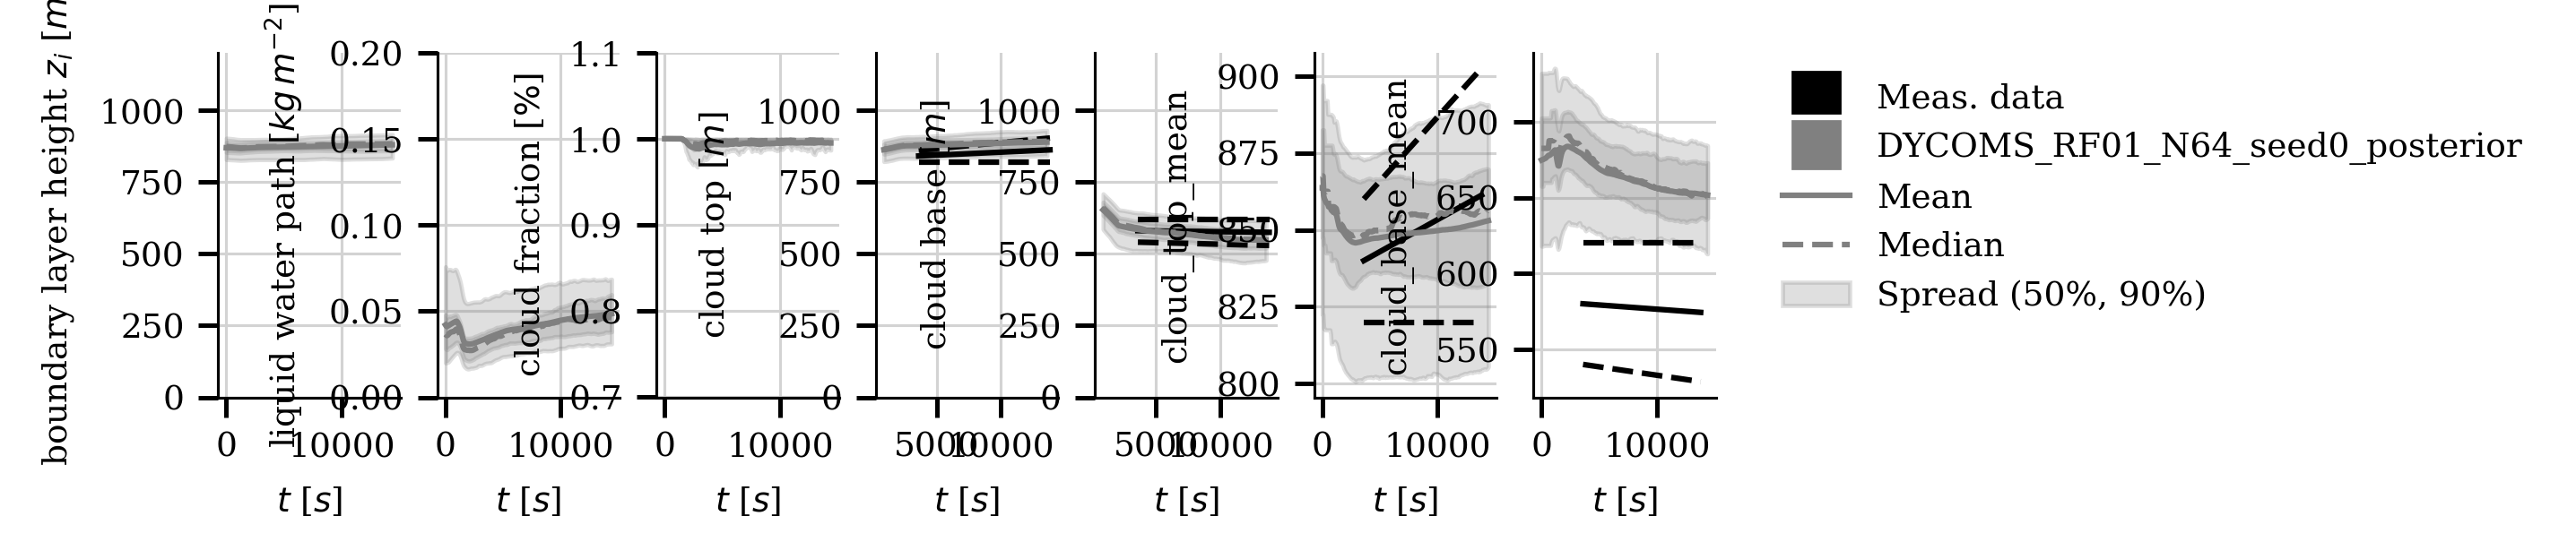

Saved figure  ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0_posterior/fig-ensemble_obs_DYCOMS_RF01_N64_seed0_posterior_timeseries


In [10]:
# after samples finished, prepare evaluation
from data_loaders import load_ens_posterior

from calpycles.pycles_ensemble import move_slurm_files

model_name = "WENO_FULLRES"
ens = load_ens_posterior(model_name)

# tidy up the ensemble path from slurm stuff
move_slurm_files(ens.path)

# clean up each sample
for sample in ens.samples:
    sample.clean_files(
        select_stats = False,       # not needed, kept for convenience
        delete_cond_stats = False,  # not needed, kept for convenience
    )

# prepare evaluation
ens.obs_ens.observe()
ens.obs_ens.compute_stats()
ens.plot()

Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64_seed0...
... done loading samples for ensemble DYCOMS_RF01_N64_seed0.
Loaded observation DYCOMS_RF01_N64_seed0 from ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_observations.nc.
Using default parameter properties in parameter ensemble init.
Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_FULLRES/REAL/DYCOMS_RF01_N64_seed0_posterior/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64_seed0_posterior...
... done loading samples for ensemble DYCOMS_RF01_N64_seed0_posterior.
Loaded observation DYCOMS_RF01_N64_seed0_posterior from ./data/WENO_FULLRES/REAL/DYCOMS_RF01_N64_seed0_posterior/samples_observations.nc.
Reading full profiles and timeseries for ObEnsembleDYCOMS_RF01...
	[create_mfda

/cluster/work/climate/dgrund/git/dana-grund/CalPyCLES/environment/.venv/calpycles/lib/python3.9/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


	[create_mfdataset_with_nans()] Found 1 files.


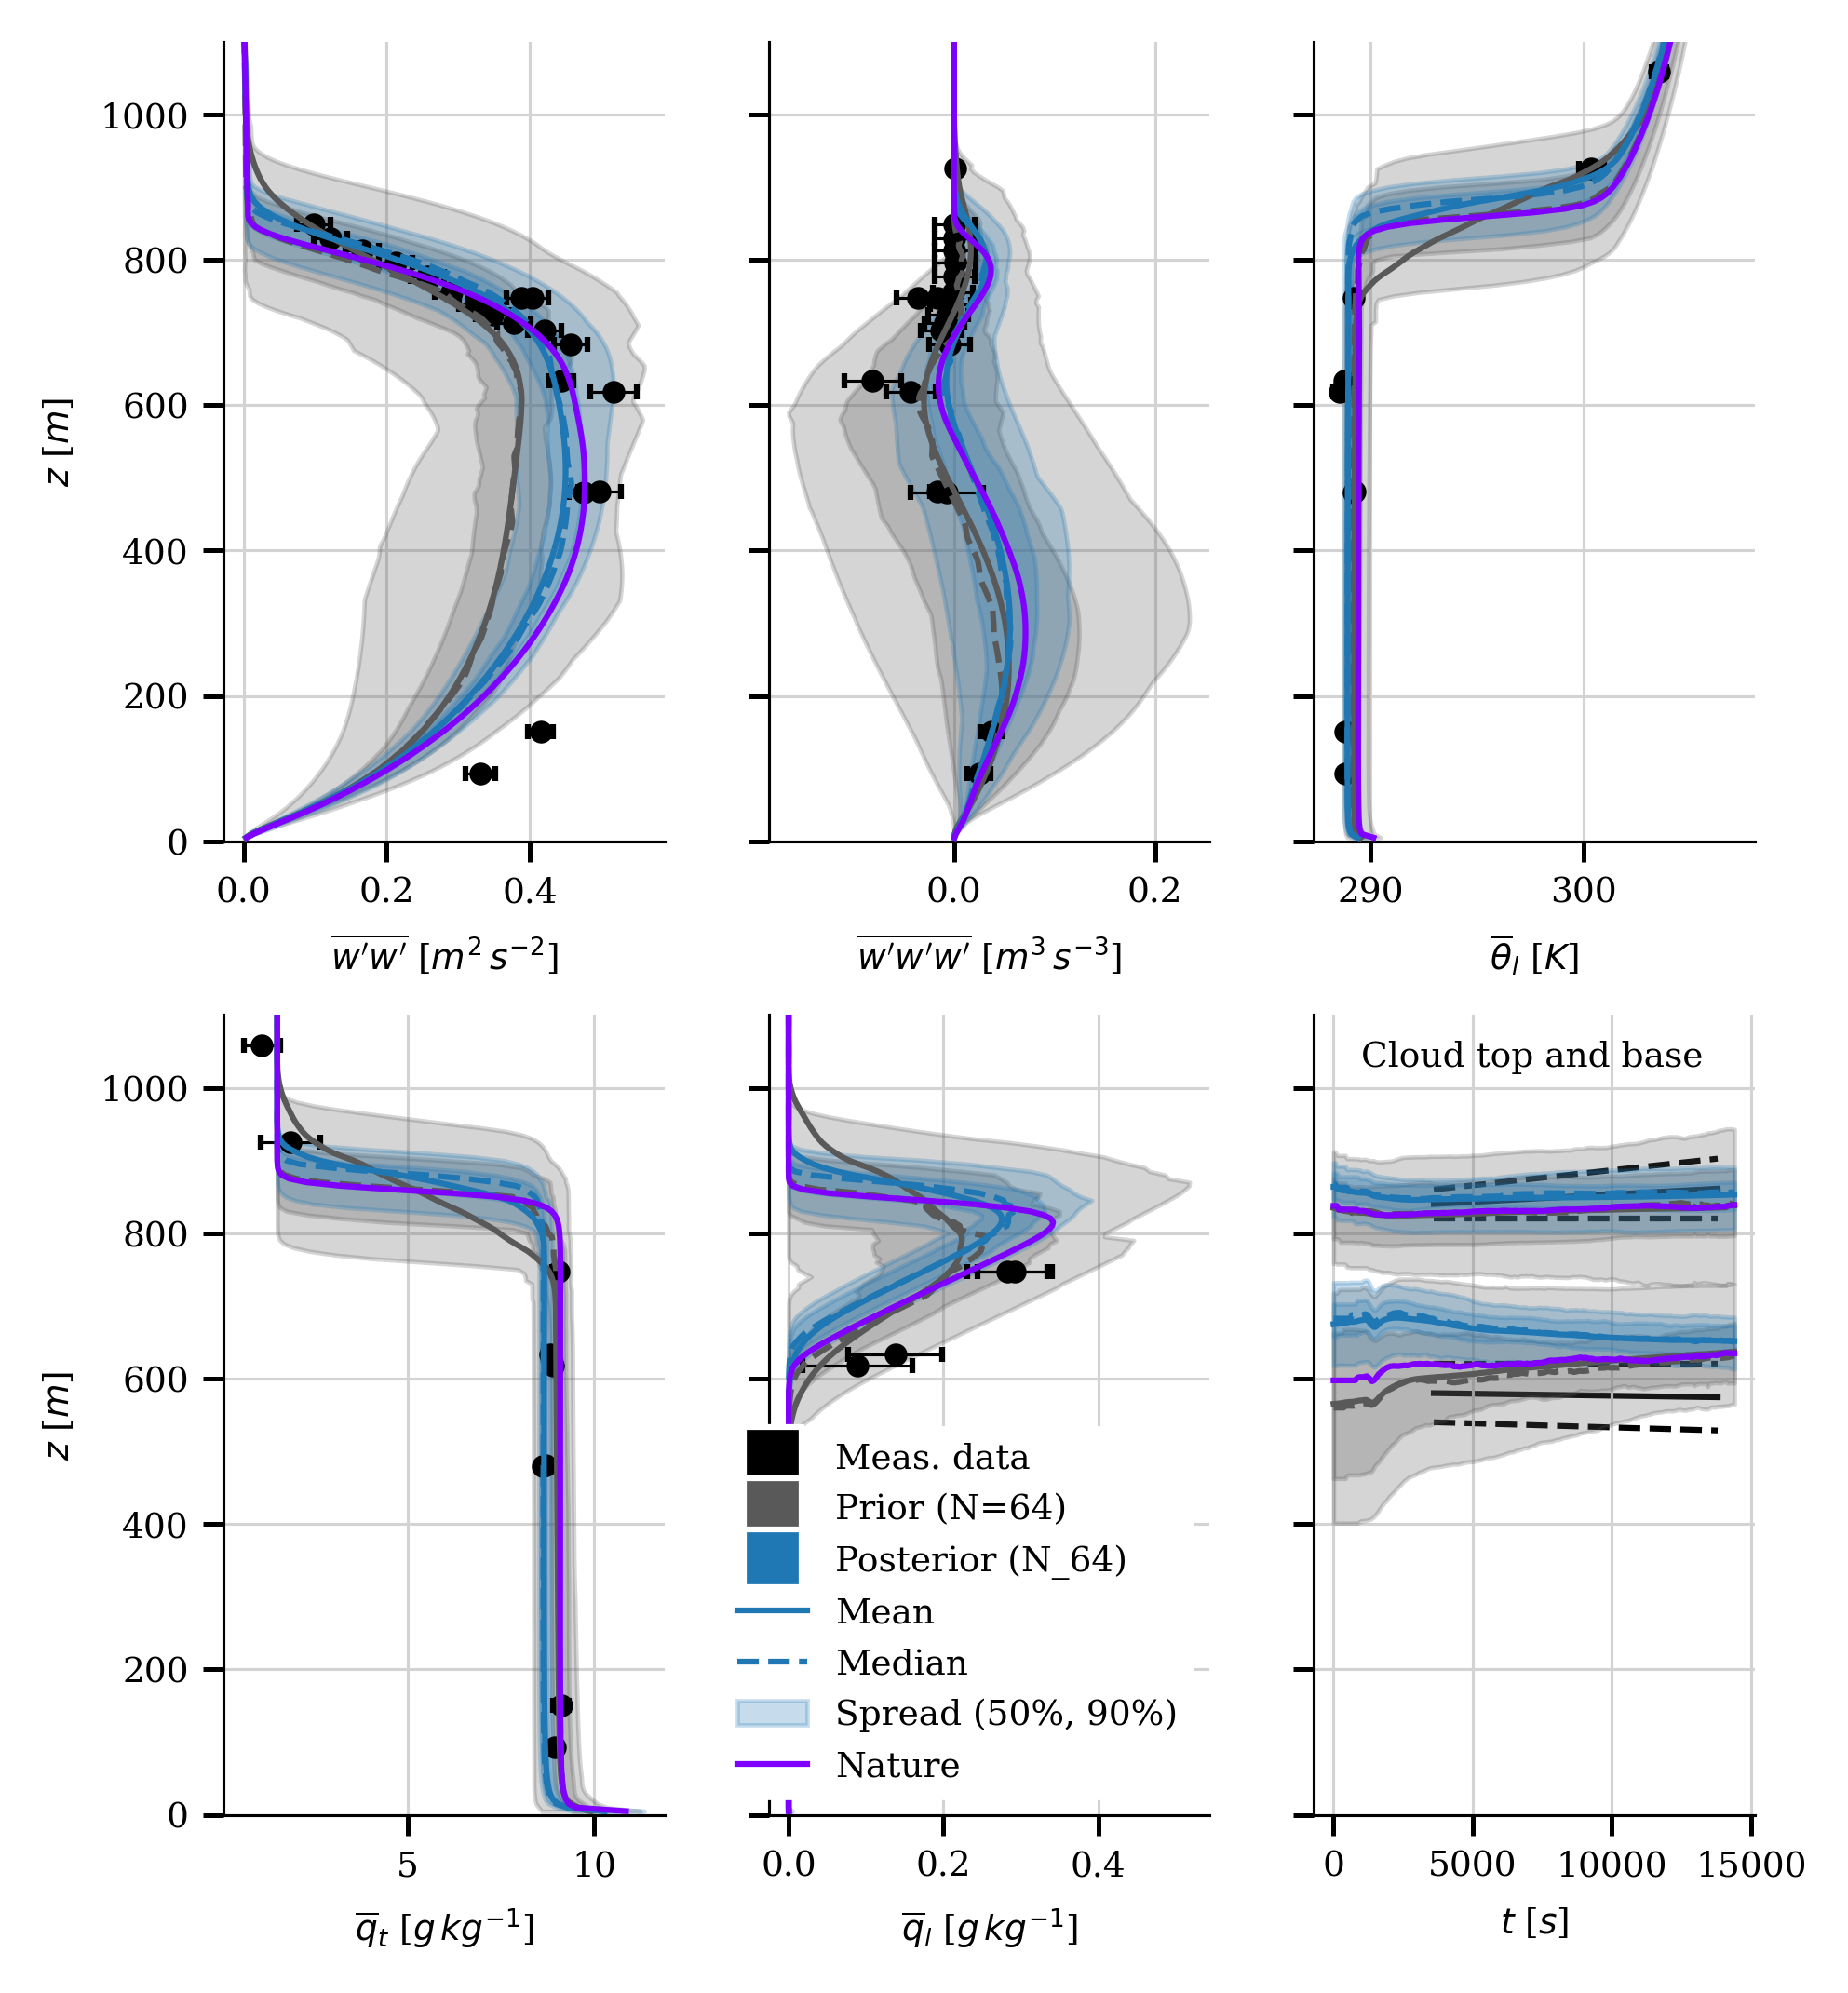

Saved figure  figs/WENO_FULLRES/fig-obs_prior_posterior_WENO_FULLRES


In [13]:
from data_loaders import load_ens
from data_loaders import load_ens_posterior
from data_loaders import load_nature
from calpycles.plotting.ens_obs import plot_ens_obs
from calpycles.DYCOMS_RF01.measurements import MeasurementsDYCOMS_RF01
meas = MeasurementsDYCOMS_RF01()

model_name = "WENO_FULLRES"
ens = load_ens(model_name)
ens_post = load_ens_posterior(model_name)

nature = load_nature(model_name)

plot_ens_obs(
    ensembles=[ens, ens_post],
    ens_labels=["Prior (N=64)", "Posterior (N_64)"],
    data=meas,
    nature=nature,
    nature_name="Nature",
    save_file=f"figs/{model_name}/REAL/fig-obs_prior_posterior_{model_name}",
    cloud_height_type="mean",
)

In [4]:
### add hist of linear enkf prediction (where the enkf wanted to go)

from data_loaders import default_seeds
from data_loaders import load_da
from data_loaders import load_ens
from data_loaders import load_ens_posterior
from calpycles.enkf_calibration import get_ens
from calpycles.enkf_calibration import change_rate_units

model_name = "WENO_FULLRES"
DA = load_da(model_name=model_name)

# prior observation ensemble
Eo = DA.Eo

# posterior by model eval
ens_post = load_ens_posterior(model_name)
_, Eo_post = get_ens(ens_post)
# change rate units like in DA
Eo_post, _, _ = change_rate_units(Eo=Eo_post)

# posterior by linear prediction
seed = default_seeds[model_name]
Eo_post_pred = DA.analysis_observations(seed=seed)

Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64_seed0...
... done loading samples for ensemble DYCOMS_RF01_N64_seed0.
Loaded observation DYCOMS_RF01_N64_seed0 from ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_observations.nc.
[3.08641975e-07 4.34027778e-06]
[ 4.   56.25]
Using default parameter properties in parameter ensemble init.
Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_FULLRES/REAL/DYCOMS_RF01_N64_seed0_posterior/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64_seed0_posterior...
... done loading samples for ensemble DYCOMS_RF01_N64_seed0_posterior.
Loaded observation DYCOMS_RF01_N64_seed0_posterior from ./data/WENO_FULLRES/REAL/DYCOMS_RF01_N64_seed0_posterior/samples_observations.nc.
Setting measurement perturbation 

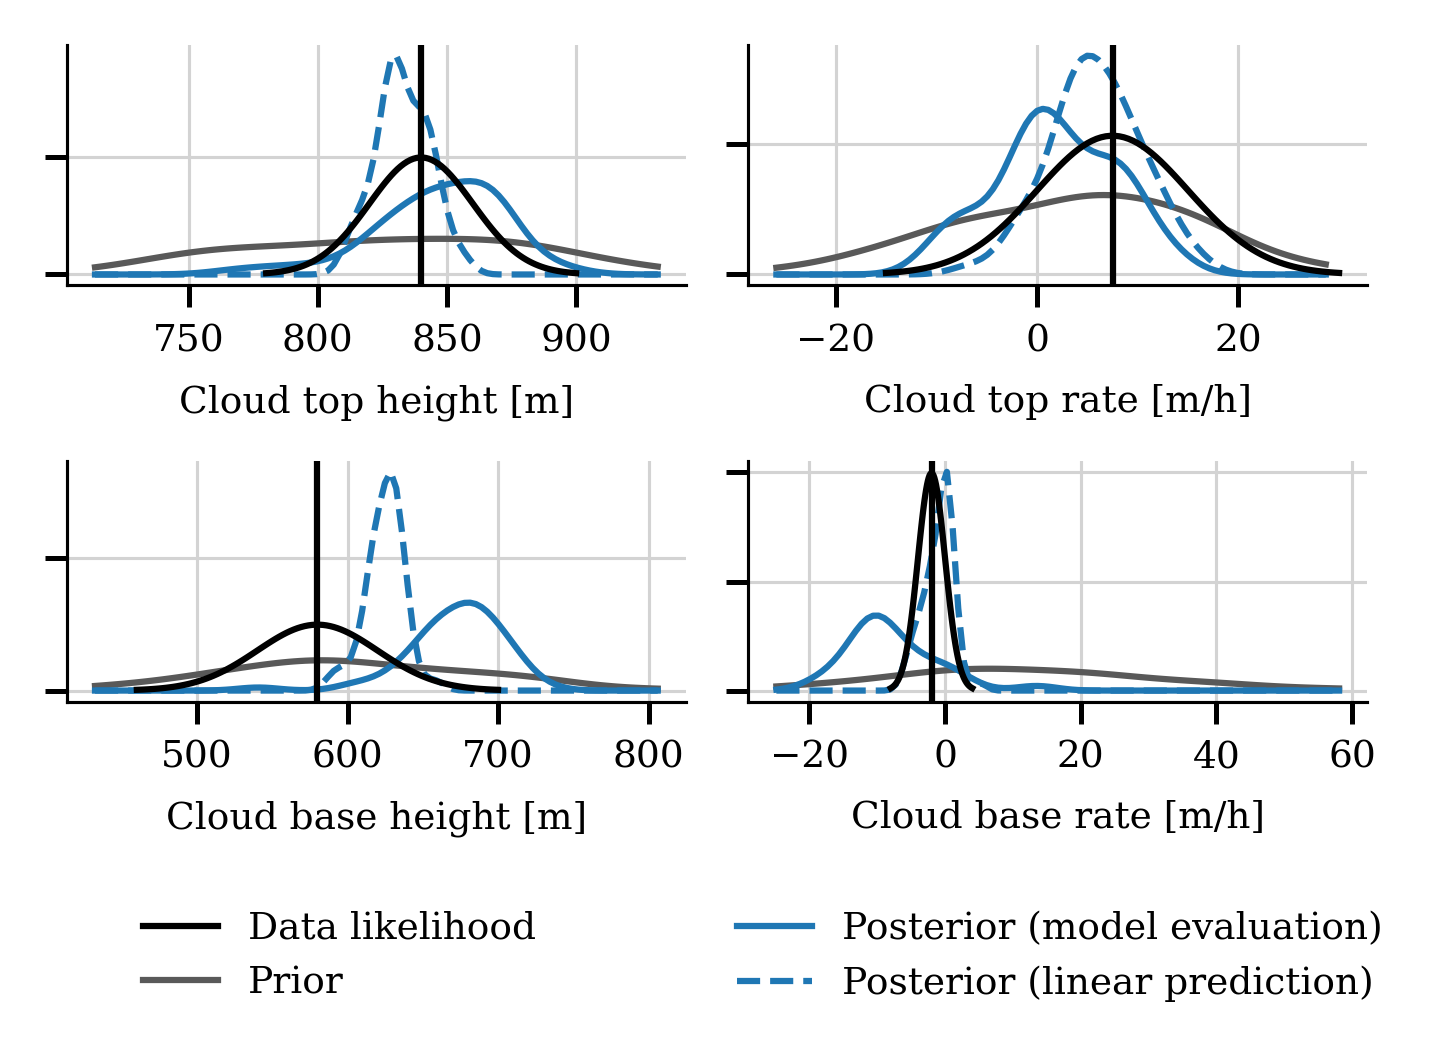

Saved figure  figs/WENO_FULLRES/REAL/fig-cloud_height_hists_pred


In [8]:
from calpycles.plotting.bayes import plot_bayes_cloud_ts

plot_bayes_cloud_ts(
    Eo,
    Eo_post,
    Eo_post_pred,
    DA.y,
    DA.hnoise,
    f"figs/{model_name}/REAL/fig-cloud_height_hists_pred",
)